In [59]:
# Crisps Inputs

In [60]:
!pip install -U scikit-fuzzy

In [61]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [62]:
# Define linguistic variables and fuzzy sets for input variables
data_redundancy = ctrl.Antecedent(np.arange(0, 101, 1), 'data_redundancy')
degradation_level = ctrl.Antecedent(np.arange(0, 101, 1), 'degradation_level')
error_history = ctrl.Antecedent(np.arange(0, 101, 1), 'error_history')
# Define linguistic variable and fuzzy sets for output variable
error_likelihood = ctrl.Consequent(np.arange(0, 101, 1), 'error_likelihood')

# Define fuzzy sets for each linguistic variable
data_redundancy['Low'] = fuzz.trimf(data_redundancy.universe, [0, 0, 50])
data_redundancy['Medium'] = fuzz.trimf(data_redundancy.universe, [0, 50, 100])
data_redundancy['High'] = fuzz.trimf(data_redundancy.universe, [50, 100, 100])

degradation_level['Low'] = fuzz.trimf(degradation_level.universe, [0, 0, 50])
degradation_level['Medium'] = fuzz.trimf(degradation_level.universe, [0, 50, 100])
degradation_level['High'] = fuzz.trimf(degradation_level.universe, [50, 100, 100])

error_history['Low'] = fuzz.trimf(error_history.universe, [0, 0, 50])
error_history['Medium'] = fuzz.trimf(error_history.universe, [0, 50, 100])
error_history['High'] = fuzz.trimf(error_history.universe, [50, 100, 100])


# Custom membership functions for error likelihood
error_likelihood['Low'] = fuzz.trimf(error_likelihood.universe, [0, 0, 50])
error_likelihood['Medium'] = fuzz.trimf(error_likelihood.universe, [0, 50, 100])
error_likelihood['High'] = fuzz.trimf(error_likelihood.universe, [50, 100, 100])


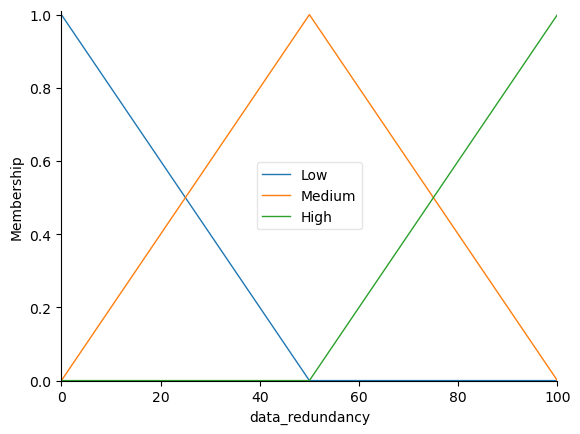

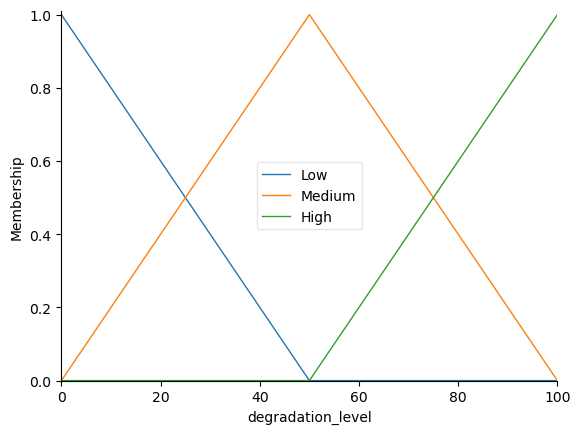

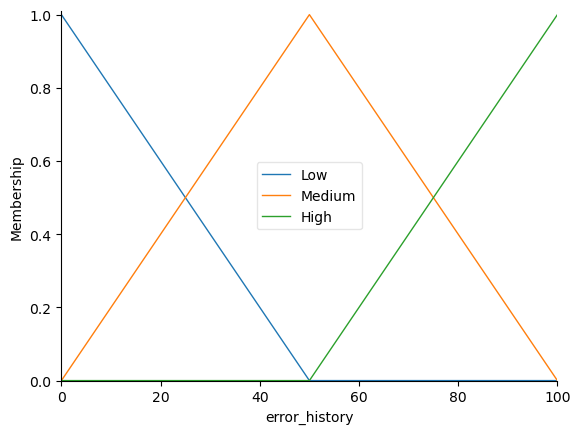

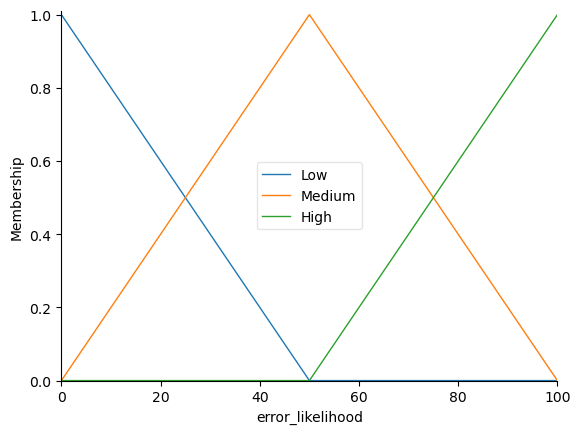

In [63]:
# Visualize membership functions
data_redundancy.view()
degradation_level.view()
error_history.view()

# Visualize membership functions for consequent
error_likelihood.view()

# Display the plots
plt.show()

In [67]:
rule1 = ctrl.Rule(data_redundancy['High'] & degradation_level['Low'] & error_history['High'], error_likelihood['Medium'])
rule2 = ctrl.Rule(data_redundancy['Medium'] & degradation_level['High'] & error_history['Medium'], error_likelihood['High'])
rule3 = ctrl.Rule(data_redundancy['Low'] & degradation_level['Medium'] & error_history['High'], error_likelihood['High'])
rule4 = ctrl.Rule(data_redundancy['High'] & degradation_level['Medium'] & error_history['Low'], error_likelihood['Medium'])
rule5 = ctrl.Rule(data_redundancy['Low'] & degradation_level['Low'] & error_history['High'], error_likelihood['Medium'])
rule6 = ctrl.Rule(data_redundancy['Medium'] & degradation_level['Low'] & error_history['Low'], error_likelihood['Low'])
rule7 = ctrl.Rule(data_redundancy['High'] & degradation_level['High'] & error_history['Low'], error_likelihood['Medium'])
rule8 = ctrl.Rule(data_redundancy['Low'] & degradation_level['High'] & error_history['High'], error_likelihood['High'])
rule9 = ctrl.Rule(data_redundancy['Medium'] & degradation_level['Medium'] & error_history['Low'], error_likelihood['Low'])
rule10 = ctrl.Rule(data_redundancy['High'] & degradation_level['Low'] & error_history['Low'], error_likelihood['Low'])


In [85]:
# Create the control system
error_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])

# Create the simulation
error_simulation = ctrl.ControlSystemSimulation(error_ctrl)

# Pass inputs to the ControlSystemSimulation using Antecedent labels 

error_simulation.input['data_redundancy'] = 70   # change this values as user inputs
error_simulation.input['degradation_level'] = 40   # change this values as user inputs
error_simulation.input['error_history'] = 10     # # change this values as user inputs

41.21951219512202


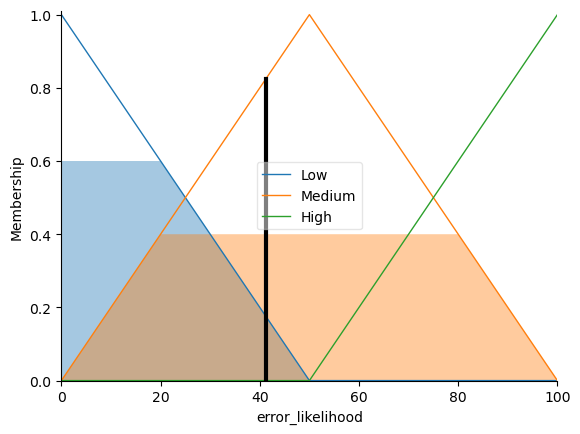

In [86]:

# Crunch the numbers
error_simulation.compute()

# Output result
print(error_simulation.output['error_likelihood'])

# Visualize the output
error_likelihood.view(sim=error_simulation)


Initiating Error Detection and Correction...
Enter Data Redundancy (0-100): 22
Enter Degradation Level (0-100): 34
Enter Error History (0-100): 55
Error Likelihood: 51.23931623931634
Medium Error
Error Correction Strategies:


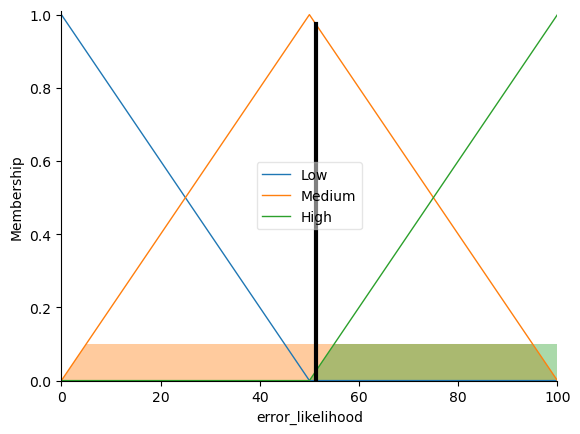

In [89]:
def error_detection_correction():
    print("Initiating Error Detection and Correction...")

    # Get user input for linguistic variables
    data_redundancy_input = float(input("Enter Data Redundancy (0-100): "))
    degradation_level_input = float(input("Enter Degradation Level (0-100): "))
    error_history_input = float(input("Enter Error History (0-100): "))

    # Set input values in the simulation
    error_simulation.input['data_redundancy'] = data_redundancy_input
    error_simulation.input['degradation_level'] = degradation_level_input
    error_simulation.input['error_history'] = error_history_input

    # Compute the output using the fuzzy system
    error_simulation.compute()

    # Display the result
    print("Error Likelihood:", error_simulation.output['error_likelihood'])

    # Print error level based on severity
    if 0 <= error_simulation.output['error_likelihood'] <= 40:
        print("Low Error")
        print("Error Correction Strategies:")
        if 0 <= data_redundancy_input <= 50:
            print("    Increase Data Redundancy.")
        else:
            print("    Data Redundancy is good")
        if 35 < degradation_level_input <= 100:
            print("    Decrease Degradation Level.")
        else:
            print("    Degradation Level is good")
        if 35 < error_history_input <= 100:
            print("    Decrease Error History.")
        else:
            print("    Error History is good")
    elif 35 < error_simulation.output['error_likelihood'] <= 65:
        print("Medium Error")
        print("Error Correction Strategies:")
        # ... (similar strategy checks for medium error)
    elif 65 < error_simulation.output['error_likelihood'] <= 100:
        print("High Error")
        print("Error Correction Strategies:")
        # ... (similar strategy checks for high error)
    else:
        print("Invalid error likelihood output")

    # Visualize the output
    error_likelihood.view(sim=error_simulation)
    plt.show()

# Call the function to test
error_detection_correction()